In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ipl.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [2]:
df.columns.unique()

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [3]:
unwanted_columns=['mid','venue','batsman', 'bowler','striker','non-striker']
df.drop(unwanted_columns,axis=1,inplace=True)

In [4]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [5]:
selected_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [6]:
df = df[df['bat_team'].isin(selected_teams) & df['bowl_team'].isin(selected_teams)]

In [7]:
df = df[df['overs']>=5.0]

In [8]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [10]:
model_df = pd.get_dummies(data=df,columns=['bat_team','bowl_team'])
model_df

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
X_train = model_df.drop('total',axis=1)[model_df['date'].dt.year<=2016]
X_test = model_df.drop('total',axis=1)[model_df['date'].dt.year>=2017]
y_train = model_df[model_df['date'].dt.year<=2016]['total'].values
y_test = model_df[model_df['date'].dt.year>=2017]['total'].values

In [13]:
X_train.drop('date',axis=1, inplace=True)
X_test.drop('date',axis=1, inplace=True)

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.532e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [44]:
lasso_regressor.best_params_

{'alpha': 1}

In [16]:
preds = lasso_regressor.predict(X_test)
preds = np.ceil(preds)
preds

array([171., 175., 174., ..., 106., 105.,  99.])

In [17]:
len(preds)

2778

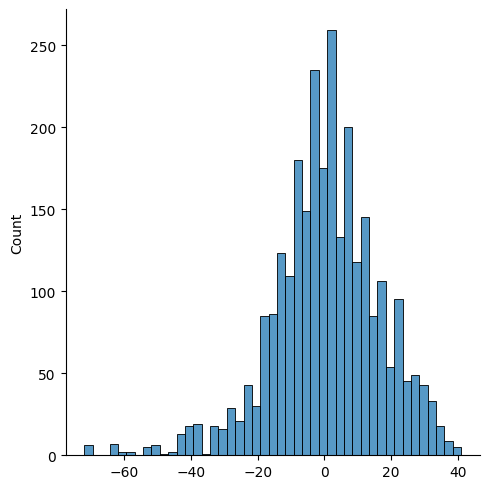

In [18]:
sns.displot(y_test-preds)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test,preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,preds))}')
y_test.mean()

MAE: 12.19258459323254
RMSE: 16.189938569096867


167.09755219582433

In [20]:
X_test.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,46,1,5.1,42,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68895,50,1,5.2,46,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68896,50,1,5.3,44,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68897,54,1,5.4,48,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68898,58,1,5.5,51,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [21]:
nth_row = X_test.iloc[67]
# nth_row = pd.DataFrame([nth_row])
nth_row['bat_team_Royal Challengers Bangalore'] = 1.0
nth_row['bat_team_Sunrisers Hyderabad'] = 0.0
nth_row['bowl_team_Royal Challengers Bangalore'] = 0.0
nth_row['bowl_team_Sunrisers Hyderabad'] = 1.0
nth_row['runs'] = 124.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12360\463174492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nth_row['bat_team_Royal Challengers Bangalore'] = 1.0
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12360\463174492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nth_row['bat_team_Sunrisers Hyderabad'] = 0.0
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12360\463174492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nth

In [22]:
np.ceil(lasso_regressor.predict(nth_row.values.reshape(1, -1)))

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([168.])

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
from scipy.stats import randint as sp_randint

In [25]:
n_estimators = np.arange(200,800,200)
max_features = ['auto','sqrt']
max_depth = [None] + sp_randint(10, 60).rvs(5).tolist()
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

In [27]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [29]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                   random_state=42)

In [30]:
random_search.fit(X_train,y_train)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 14, 48, 51, 55, 23],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([200, 400, 600])},
                   random_state=42, scoring='neg_mean_squared_error')

In [39]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 48}

In [40]:
rf_pred = random_search.predict(X_test)
rf_pred

array([181.22491532, 184.57198652, 185.65448712, ..., 117.00825712,
       114.46590535, 113.94633075])

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test,rf_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,rf_pred))}')
y_test.mean()

MAE: 13.46851626726396
RMSE: 18.051335397891695


167.09755219582433

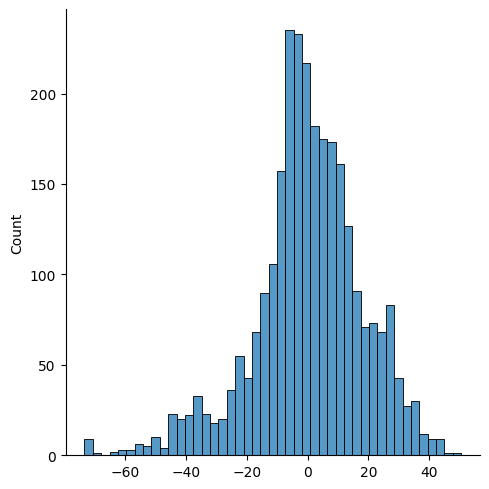

In [42]:
sns.displot(y_test-rf_pred)

In [44]:
from sklearn.svm import SVR
svr = SVR(C=0.5,kernel='linear',epsilon=1)


In [45]:
svr.fit(X_train,y_train)

SVR(C=0.5, epsilon=1, kernel='linear')

In [46]:
svr_l_p = svr.predict(X_test)
svr_l_p


array([174.30072778, 177.46147254, 176.75986426, ..., 108.22600338,
       107.53765828, 102.51053916])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test,svr_l_p)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,svr_l_p))}')
y_test.mean()

MAE: 12.141142013838188
RMSE: 16.414281791558658


167.09755219582433

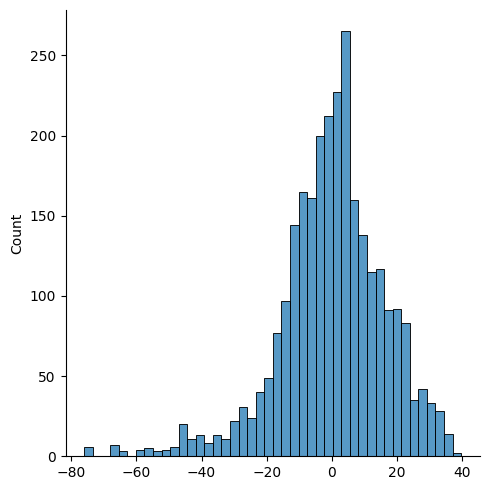

In [48]:
sns.displot(y_test-svr_l_p)